In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Scikit-learn Classification Algorithms

範例來源: [Reference](https://github.com/mmmayo13/scikit-learn-classifiers/blob/master/sklearn-classifiers-tutorial.ipynb)

### Utilities
* scikit-learn
* matplotlib
* pandas

### A. Iris Dataset
1. Data Preparation
2. Exploring Data
    * Statistics
    * Visualization
    * Dimension Reduction
3. Logistic Regression
    * Preparation
    * Training/Testing

### B. MNIST Dataset

## A. Exploring Data

* [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set)
3 class and 4 features

In [2]:
# load dataset
iris = datasets.load_iris()

In [3]:
# Load iris dataset into a dataframe for exploration
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target

# Output head of iris dataframe for instance inspection (default 5)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
# Display a description of the iris dataset as summary
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Visualization

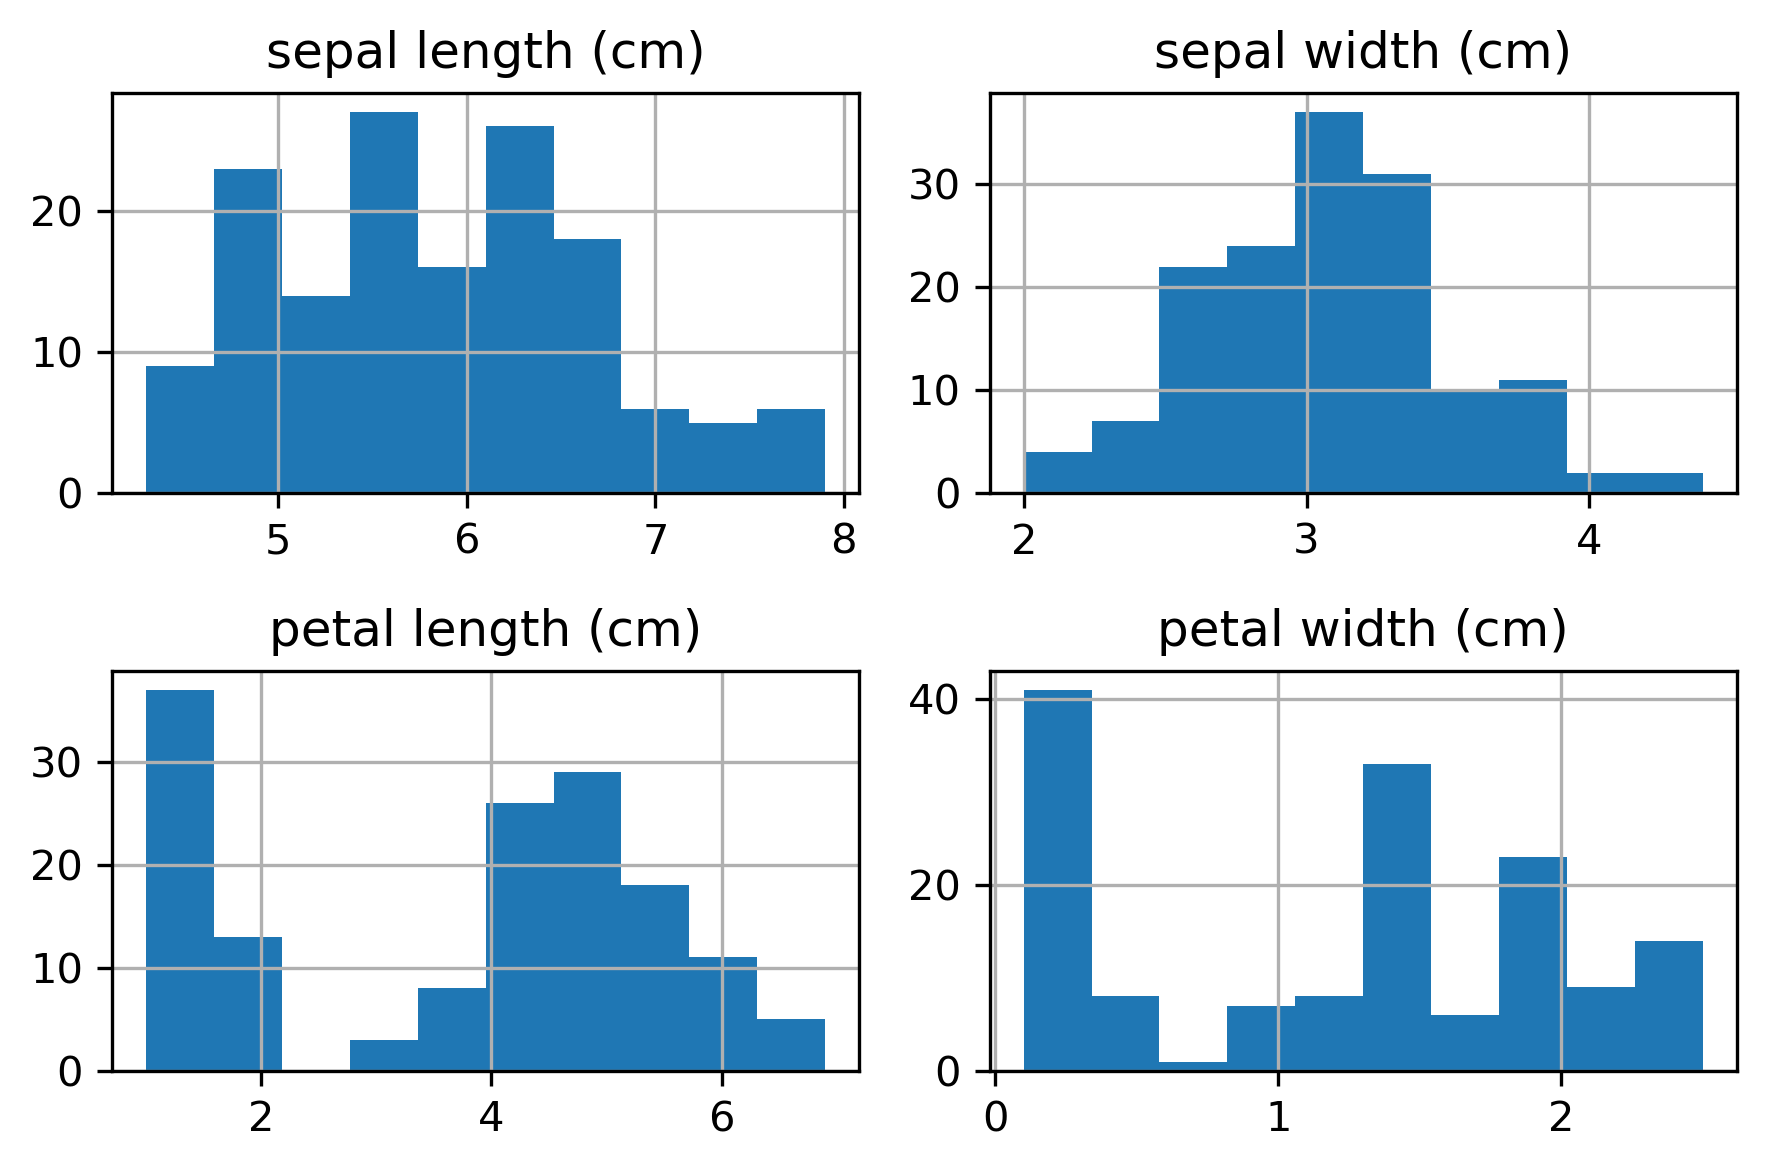

In [5]:
# Sepal length histogram

plt.figure(dpi=300)
plt.subplot(2,2,1)
iris_df['sepal length (cm)'].hist()
plt.title('sepal length (cm)')

plt.subplot(2,2,2)
iris_df['sepal width (cm)'].hist()
plt.title('sepal width (cm)')

plt.subplot(2,2,3)
iris_df['petal length (cm)'].hist()
plt.title('petal length (cm)')

plt.subplot(2,2,4)
iris_df['petal width (cm)'].hist()
plt.title('petal width (cm)')
plt.tight_layout()

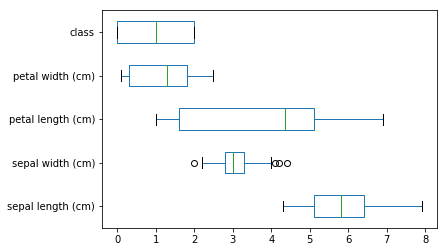

In [6]:
# Dataset boxplot
iris_df.plot(kind='box', vert=False)

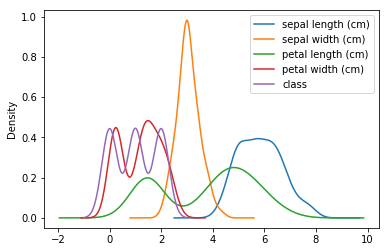

In [7]:
# Dataset density plot
iris_df.plot(kind='kde')

## Dimension Reduction

* Reading Materials
    * [機器/統計學習:主成分分析(Principal Component Analysis, PCA)](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E7%B5%B1%E8%A8%88%E5%AD%B8%E7%BF%92-%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90-principle-component-analysis-pca-58229cd26e71)
    * [機器學習: 降維(Dimension Reduction)- 線性區別分析( Linear Discriminant Analysis](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E9%99%8D%E7%B6%AD-dimension-reduction-%E7%B7%9A%E6%80%A7%E5%8D%80%E5%88%A5%E5%88%86%E6%9E%90-linear-discriminant-analysis-d4c40c4cf937)




* 為何要降維? [Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

    * 維度災難：  
        在樣本量一定的情況下，維度越高，樣本在空間中的分佈越呈現稀疏性。換句話說，隨著維度的增加,需要的資料量也會隨之迅速增長。


另外，我們發現某些特徵(feature)屬性之間存在著高度的相互關聯，我們可以藉由捨棄重複或高相關的特徵來將低維度。
簡而言之，降維就是希望：
1. 減少預測的變數(特徵)
2. 使這些變數(特徵)盡量是獨立的
3. 可視話語解釋結果

通過降維後，由於資料的維度數減少，我們不再需要大量的資料。
好的降為方法可以讓模型學習速度會更快，效能不會差異太多甚至有機會更好。

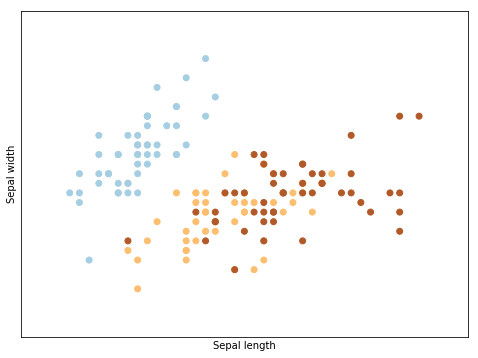

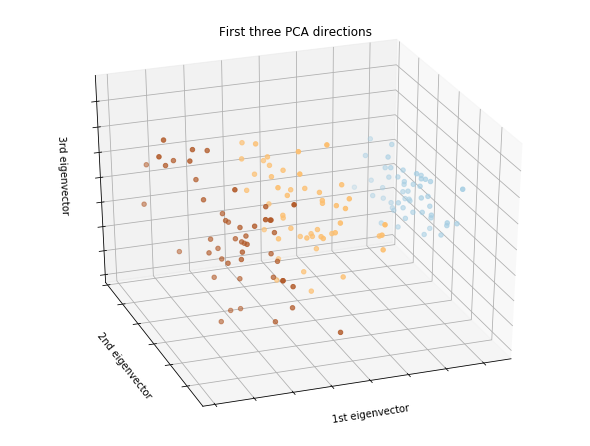

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# import some data to play with
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Logistic Regression

In [9]:
# Preparing Dataset
# X and y are the predictor and target, respectively
X = iris.data
y = iris.target

# Number of samples in the iris dataset
n_sample = len(X)

# shuffling
np.random.seed(0)
order = np.random.permutation(n_sample)
num_train = int(.8 * n_sample)

X = X[order]
y = y[order].astype(np.float)

# Split training/testing sets
X_train = X[:num_train ]
y_train = y[:num_train ]
X_test = X[num_train:]
y_test = y[num_train:]

print('Number of training data:', num_train)
print('Number of testing data:', n_sample - num_train)

Number of training data: 120
Number of testing data: 30


In [10]:
# Import logistic regression library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Create the logistic regression model object
logistic = LogisticRegression()

# Train the model
logistic.fit(X_train, y_train)

# Check the score
score = logistic.score(X_train, y_train)

In [11]:
def compute_accuracy(y, y_):
    return 1.0 - (y != y_).mean()

y_pred_train = logistic.predict(X_train)
score = compute_accuracy(y_train, y_pred_train)
print('training accuracy:', score)

training accuracy: 0.9666666666666667


In [12]:
# Predict the class of test set
y_pred_test = logistic.predict(X_test)
score = compute_accuracy(y_test, y_pred_test)
print('testing accuracy:', score)

testing accuracy: 0.9333333333333333


In [13]:
# confusion table
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  2],
       [ 0,  0,  9]])

# Comparison between Classifiers

## MNIST Dataset

* Reference:
    * [MNIST](http://yann.lecun.com/exdb/mnist/)
    * [Test several classification algorithms on Otto product data](https://github.com/bschieche/python-sklearn-otto/blob/master/otto-classification-challenge.ipynb?fbclid=IwAR04sdOgtZVhhjo33TInGnXqZDCgphHD5yHG-fs9NROrlO4WtRID_xM6OHs)

In [14]:
from sklearn.datasets import fetch_openml

# Preparing Dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, data_home='data')

X = X[:1000]
y = y[:1000]

# Number of samples
n_sample = len(X)

# shuffling
np.random.seed(0)
order = np.random.permutation(n_sample)
num_train = int(.7 * n_sample)

X = X[order]
y = y[order].astype(np.float)

# Split training/testing sets
X_train = X[:num_train]
y_train = y[:num_train]
X_test = X[num_train:]
y_test = y[num_train:]

print('Number of training data:', num_train)
print('Number of testing data:', n_sample - num_train)

Number of training data: 700
Number of testing data: 300


In [15]:
print(X.shape)

(1000, 784)


## Compare several classifiers

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

# from xgboost.sklearn import XGBClassifier

### Logistic Regression

In [17]:
log_clf = LogisticRegression()

# Train the model
log_clf.fit(X_train, y_train)

# testing
y_train_pred = log_clf.predict(X_train)
y_test_pred  = log_clf.predict(X_test)

In [18]:
score = compute_accuracy(y_train, y_train_pred)
print('training accuracy:', score)

score = compute_accuracy(y_test, y_test_pred)
print('testing accuracy:', score)

training accuracy: 1.0
testing accuracy: 0.8333333333333334


### Nearest Neighbors classification

In [19]:
knn_clf = KNeighborsClassifier()

# train
knn_clf.fit(X_train, y_train)

# testing
y_train_pred = knn_clf.predict(X_train)
y_test_pred  = knn_clf.predict(X_test)

In [20]:
score = compute_accuracy(y_train, y_train_pred)
print('training accuracy:', score)

score = compute_accuracy(y_test, y_test_pred)
print('testing accuracy:', score)

training accuracy: 0.9
testing accuracy: 0.8366666666666667


### Linear SVM

In [21]:
svc_clf = SVC(kernel="linear", probability=True)

# train
svc_clf.fit(X_train, y_train)

# testing
y_train_pred = svc_clf.predict(X_train)
y_test_pred  = svc_clf.predict(X_test)

In [22]:
score = compute_accuracy(y_train, y_train_pred)
print('training accuracy:', score)

score = compute_accuracy(y_test, y_test_pred)
print('testing accuracy:', score)

training accuracy: 1.0
testing accuracy: 0.88


### Random Forest

In [23]:
forest_clf = RandomForestClassifier(n_estimators=50, n_jobs=-1)

# train
forest_clf.fit(X_train, y_train)

# testing
y_train_pred = forest_clf.predict(X_train)
y_test_pred  = forest_clf.predict(X_test)

In [24]:
score = compute_accuracy(y_train, y_train_pred)
print('training accuracy:', score)

score = compute_accuracy(y_test, y_test_pred)
print('testing accuracy:', score)

training accuracy: 1.0
testing accuracy: 0.8633333333333333


### Ada Boost

In [25]:
ada_clf = AdaBoostClassifier()

# train
ada_clf.fit(X_train, y_train)

# testing
y_train_pred = ada_clf.predict(X_train)
y_test_pred  = ada_clf.predict(X_test)

In [26]:
score = compute_accuracy(y_train, y_train_pred)
print('training accuracy:', score)

score = compute_accuracy(y_test, y_test_pred)
print('testing accuracy:', score)

training accuracy: 0.30428571428571427
testing accuracy: 0.20666666666666667


### Neural Net

In [27]:
mlp_clf = MLPClassifier()

# train
mlp_clf.fit(X_train, y_train)

# testing
y_train_pred = mlp_clf.predict(X_train)
y_test_pred  = mlp_clf.predict(X_test)

In [28]:
score = compute_accuracy(y_train, y_train_pred)
print('training accuracy:', score)

score = compute_accuracy(y_test, y_test_pred)
print('testing accuracy:', score)

training accuracy: 1.0
testing accuracy: 0.83


### Naive Bayes

In [29]:
bayes_clf = GaussianNB()

# train
bayes_clf.fit(X_train, y_train)

# testing
y_train_pred = bayes_clf.predict(X_train)
y_test_pred  = bayes_clf.predict(X_test)

In [30]:
score = compute_accuracy(y_train, y_train_pred)
print('training accuracy:', score)

score = compute_accuracy(y_test, y_test_pred)
print('testing accuracy:', score)

training accuracy: 0.8028571428571428
testing accuracy: 0.6433333333333333


### Extra Trees

In [31]:
trees_clf = ExtraTreesClassifier(n_estimators=50,n_jobs=-1)

# train
trees_clf.fit(X_train, y_train)

# testing
y_train_pred = trees_clf.predict(X_train)
y_test_pred  = trees_clf.predict(X_test)

In [32]:
score = compute_accuracy(y_train, y_train_pred)
print('training accuracy:', score)

score = compute_accuracy(y_test, y_test_pred)
print('testing accuracy:', score)

training accuracy: 1.0
testing accuracy: 0.8833333333333333


## Takeaway

* 維度與空間的想像思考
* 如何視覺化？
    * 統計
    * 降為
* 模型選擇？
    * 了解運作原理和過程是為了幫助模型選擇與調參
    * 黑箱
* 確認正確的模型？
    * 少量data, overfitting
* 魔鬼藏在細節裡
    * 資料收集
        * 每類數量盡量均衡
        * 資料清理
        * feature的設計
    * Shuffling
    * 中位數與平均值
    * hyper-parameter?
        * cross validation